In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# 2. Tải file dữ liệu
df = pd.read_csv('btc.csv')
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,3853.757080,3907.795410,3851.692383,3859.583740,3859.583740,7661247975
1,2019-03-02,3855.318115,3874.607422,3832.127930,3864.415039,3864.415039,7578786076
2,2019-03-03,3862.266113,3875.483643,3836.905762,3847.175781,3847.175781,7253558152
3,2019-03-04,3845.091553,3867.381836,3733.749756,3761.557129,3761.557129,9029175788
4,2019-03-05,3759.832520,3903.916748,3745.183105,3896.375000,3896.375000,10174126415
...,...,...,...,...,...,...,...
1914,2024-05-27,68512.179688,70597.882812,68232.500000,69394.554688,69394.554688,25870990717
1915,2024-05-28,69392.195312,69514.640625,67227.156250,68296.218750,68296.218750,32722265965
1916,2024-05-29,68296.351562,68852.460938,67101.492188,67578.093750,67578.093750,26707072906
1917,2024-05-30,67576.085938,69500.539062,67118.078125,68364.992188,68364.992188,29509712534


In [2]:
# Chia train test validate theo tỉ lệ 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [3]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1) #x_train chứa các chỉ số, là biến độc lập
y_train = np.array(train_data['Close']) #y_train chứa gtr Close, là biến phụ thuộc

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [4]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val = model.predict(x_val)

In [5]:
# 6. Quá trình tạo index predict 100 ngày tiếp theo
last_index =  df.index[-1] #lấy chỉ số dòng cuối cùng trong dataframe
last_data = pd.RangeIndex(start=last_index, stop=last_index+100, step=1)

# Tạo một mảng numpy chứa 100 số nguyên liên tiếp bắt đầu từ last_index + 1
x_next_100_days = np.array(range(last_index+1, last_index+101)).reshape(-1, 1)

# Dự đoán giá đóng cửa (Close) cho 100 ngày tiếp theo
y_next_100_days = model.predict(x_next_100_days)

# In ra giá đóng cửa dự đoán cho 100 ngày tiếp theo
print('Predicted closing prices for the next 100 days:')
print(y_next_100_days)

Predicted closing prices for the next 100 days:
[61670.70011856 61700.34142681 61729.98273507 61759.62404333
 61789.26535159 61818.90665984 61848.5479681  61878.18927636
 61907.83058462 61937.47189287 61967.11320113 61996.75450939
 62026.39581765 62056.03712591 62085.67843416 62115.31974242
 62144.96105068 62174.60235894 62204.24366719 62233.88497545
 62263.52628371 62293.16759197 62322.80890022 62352.45020848
 62382.09151674 62411.732825   62441.37413325 62471.01544151
 62500.65674977 62530.29805803 62559.93936629 62589.58067454
 62619.2219828  62648.86329106 62678.50459932 62708.14590757
 62737.78721583 62767.42852409 62797.06983235 62826.7111406
 62856.35244886 62885.99375712 62915.63506538 62945.27637363
 62974.91768189 63004.55899015 63034.20029841 63063.84160667
 63093.48291492 63123.12422318 63152.76553144 63182.4068397
 63212.04814795 63241.68945621 63271.33076447 63300.97207273
 63330.61338098 63360.25468924 63389.8959975  63419.53730576
 63449.17861401 63478.81992227 63508.46

In [6]:
# 7. Tính RMSE: Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Tính MAE cho validate và test
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))

# Tính MAPE cho validate và test
valid_mape = np.mean(np.abs((y_pred_val - y_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# In kết quả
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 11126.274922264492
Testing RMSE: 24725.342556343014
Validation MAE: 9862.473856381786
Testing MAE: 24531.971435284086
Validation MAPE: 20.640998904581316
Testing MAPE: 102.29476538702198


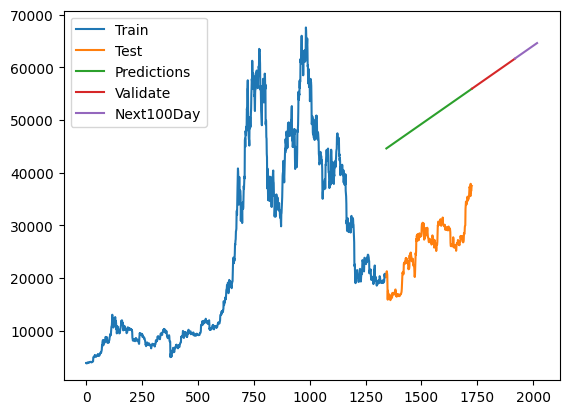

In [7]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_100_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next100Day'])
plt.show()